In [1]:
import numpy as np
from skimage import io, color, transform
from matplotlib import pyplot as plt
import os
image_size = 256

In [ ]:
np.load()

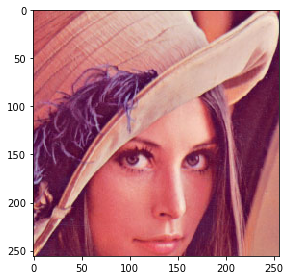

In [56]:
images = np.zeros((100, image_size, image_size, 3))
for i in range(20):
    for index, image in enumerate(os.listdir("test")):
        images[index + 5*i, :, :, :] = transform.resize(io.imread("test/" + image), (image_size, image_size))
    
io.imshow(images[47])
plt.show()
images = color.rgb2lab(images)

In [49]:
def images_to_buckets(images):
    colors = np.arange(-135, 145, 10)
    bins_to_colors = np.arange(-130, 140, 10)
    bins_to_colors[0] = -128
    bins_to_colors[-1] = 127
    bins = np.zeros((5, image_size, image_size))
    image_colors_in_bins = np.digitize(images[:, :, :, 1:], colors)
    image_colors_in_bins = image_colors_in_bins - 1
    print image_colors_in_bins[1, :, :, 1]
    bins = 26*image_colors_in_bins[:, :, :, 0] + image_colors_in_bins[:, :, :, 1]
    print bins
    return bins

In [32]:
np.arange(-130, 140, 10)

array([-130, -120, -110, -100,  -90,  -80,  -70,  -60,  -50,  -40,  -30,
        -20,  -10,    0,   10,   20,   30,   40,   50,   60,   70,   80,
         90,  100,  110,  120,  130])

In [50]:
image_colors_in_bins = images_to_buckets(images)

[[13 13 13 ..., 13 13 13]
 [13 13 13 ..., 13 13 13]
 [13 13 13 ..., 13 13 13]
 ..., 
 [13 13 13 ..., 13 13 13]
 [13 13 13 ..., 13 13 13]
 [13 13 13 ..., 13 13 13]]
[[[351 351 351 ..., 351 351 351]
  [351 351 351 ..., 351 351 351]
  [351 351 351 ..., 351 351 351]
  ..., 
  [351 351 351 ..., 351 351 351]
  [351 351 351 ..., 351 351 351]
  [351 351 351 ..., 351 351 351]]

 [[351 351 351 ..., 351 351 351]
  [351 351 351 ..., 351 351 351]
  [351 351 351 ..., 351 351 351]
  ..., 
  [351 351 351 ..., 351 351 351]
  [351 351 351 ..., 351 351 351]
  [351 351 351 ..., 351 351 351]]

 [[457 457 457 ..., 485 458 458]
  [457 457 457 ..., 458 457 457]
  [457 457 457 ..., 456 456 481]
  ..., 
  [432 405 379 ..., 405 405 405]
  [406 380 405 ..., 405 405 405]
  [379 380 432 ..., 405 405 405]]

 ..., 
 [[457 457 457 ..., 485 458 458]
  [457 457 457 ..., 458 457 457]
  [457 457 457 ..., 456 456 481]
  ..., 
  [432 405 379 ..., 405 405 405]
  [406 380 405 ..., 405 405 405]
  [379 380 432 ..., 405 405 405]

In [51]:
frequency = np.bincount(image_colors_in_bins.flatten(), minlength=26*26)

In [35]:
frequency.shape

(676,)

In [52]:
np.argmax(frequency)

351

In [25]:
np.arange(26*26).shape

(676,)

In [53]:
mean = np.sum(np.dot(frequency, np.arange(26*26)))/np.sum(frequency)

In [54]:
mean

413